# The Sparks Foundation (GRIP, Data Science and Business Analytics)
## Task 3: Exploratory Data Analysis - Retail

#### Problem Statement:
i) Finding out the weak areas where one can work to make profits <br>
ii) Finding business problems by exploring the data


#### Dataset Used:
'https://bit.ly/3i4rbWl' (Sample Superstore Dataset)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('SampleSuperstore.csv')
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


#### Attribute understanding:

- Ship Mode - Methods of shipping the products to its destination
- Segment - Business model (Consumer, Corporate or Home office)
- City, State, Country, Postal Code, Region - Geographical location 
- Category - Divided based on needs of the target group
- Sales - Number of transaction of goods and services
- Quantity - Amount of purchased goods
- Discount - Offers providing lower prices
- Profit - Total revenue that exceeds the total expense

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.describe(include=object)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


#### From the above tables we can conclude that:
i) There are no null or missing values in the dataset <br>
ii) The data is just applicable in United States and consist of 4 shipping modes defined for 3 segments of people. <br>
iii) Also there is an indication of presence of outliers in the Sales and Profit columns as the gap between 'min and 25% percentile' and 'max and 75% percentile is quite high

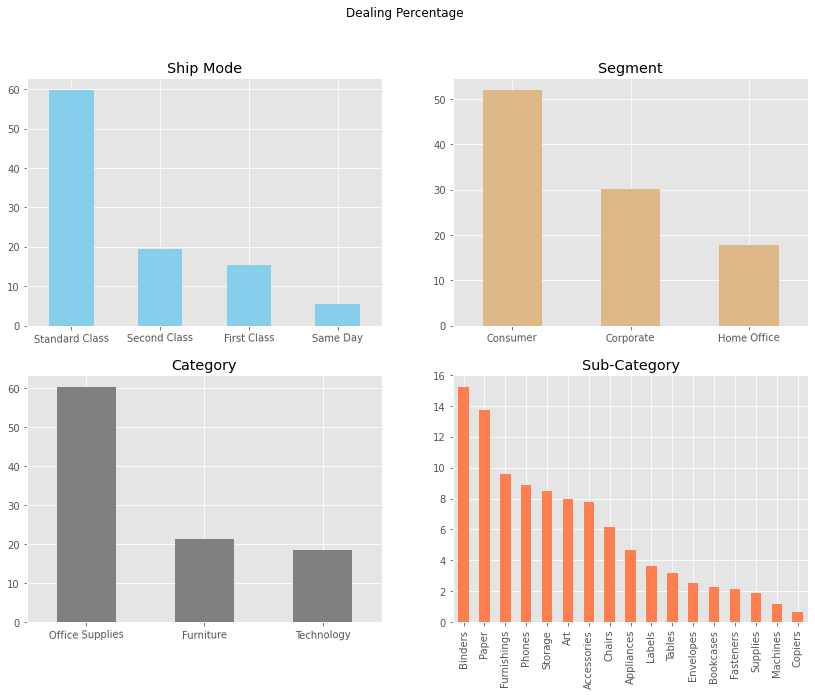

In [6]:
plt.figure(figsize=(14,10))
obj_col=['Ship Mode','Segment','Category', 'Sub-Category']
colors=['skyblue', 'burlywood', 'grey', 'coral']
for i in range(4):
    plt.style.use('ggplot')
    plt.subplot(2,2,i+1)
    seg=data[obj_col[i]].value_counts()/len(data[obj_col[i]])*100
    if i==3:
        seg.plot.bar(color=colors[i])
        plt.title(obj_col[i])
        break
    seg.plot.bar(color=colors[i],rot=True)
    plt.title(obj_col[i])
plt.suptitle('Dealing Percentage')
plt.show()

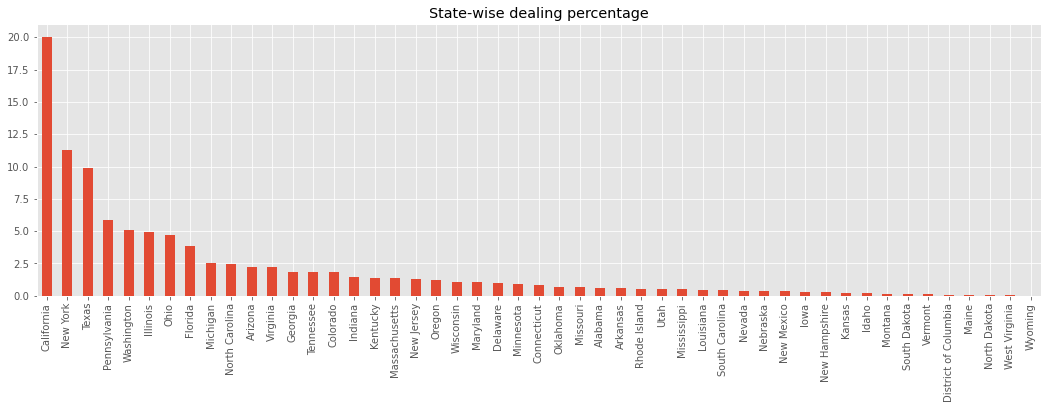

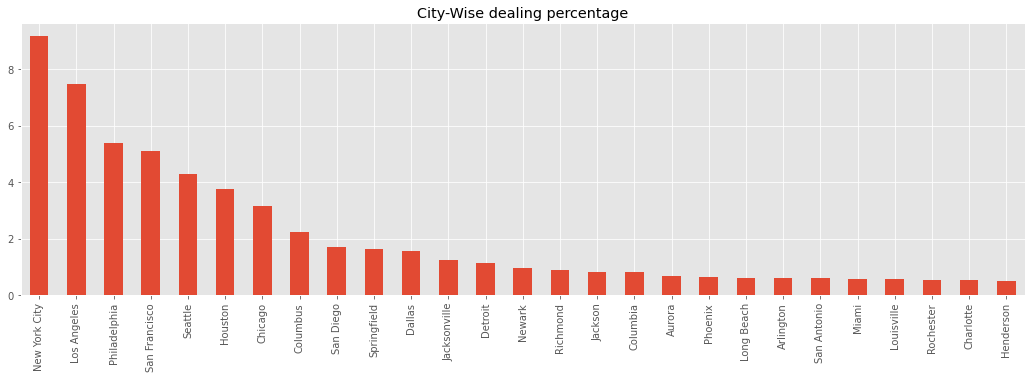

In [7]:
plt.figure(figsize=(18,5))
state_count=data['State'].value_counts()/len(data['State'])*100
state_count.plot.bar()
plt.title('State-wise dealing percentage')
plt.show()

plt.figure(figsize=(18,5))
city_count=data['City'].value_counts()/len(data['City'])*100
city_count=city_count[city_count.values>0.5]
city_count.plot.bar()
plt.title('City-Wise dealing percentage')
plt.show()

#### Above graphs tells us that the bussiness:
- deals majorly in Office Supplies which majorly includes Binders and Papers
- ships majorly using standard class (around 60%)
- has most dealings with consumer segment (around 53%)
- deals majorly in California(20%) followed by New York(11%). (State-wise)
- deals majorly in New York City(9%) followed by Los Angeles(7.5%). (City-wise)

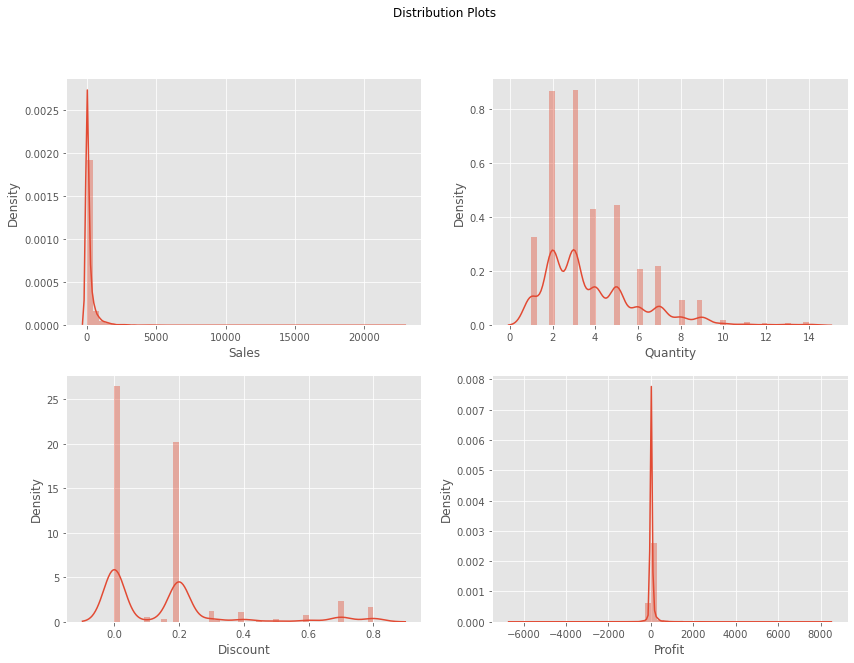

In [8]:
plt.figure(figsize=(14,10))
plt.suptitle('Distribution Plots')
plt.subplot(2,2,1)
sns.distplot(x=data.Sales)
plt.xlabel('Sales')

plt.subplot(2,2,2)
sns.distplot(x=data.Quantity)
plt.xlabel('Quantity')

plt.subplot(2,2,3)
sns.distplot(x=data.Discount)
plt.xlabel('Discount')

plt.subplot(2,2,4)
sns.distplot(x=data.Profit)
plt.xlabel('Profit')

plt.show()

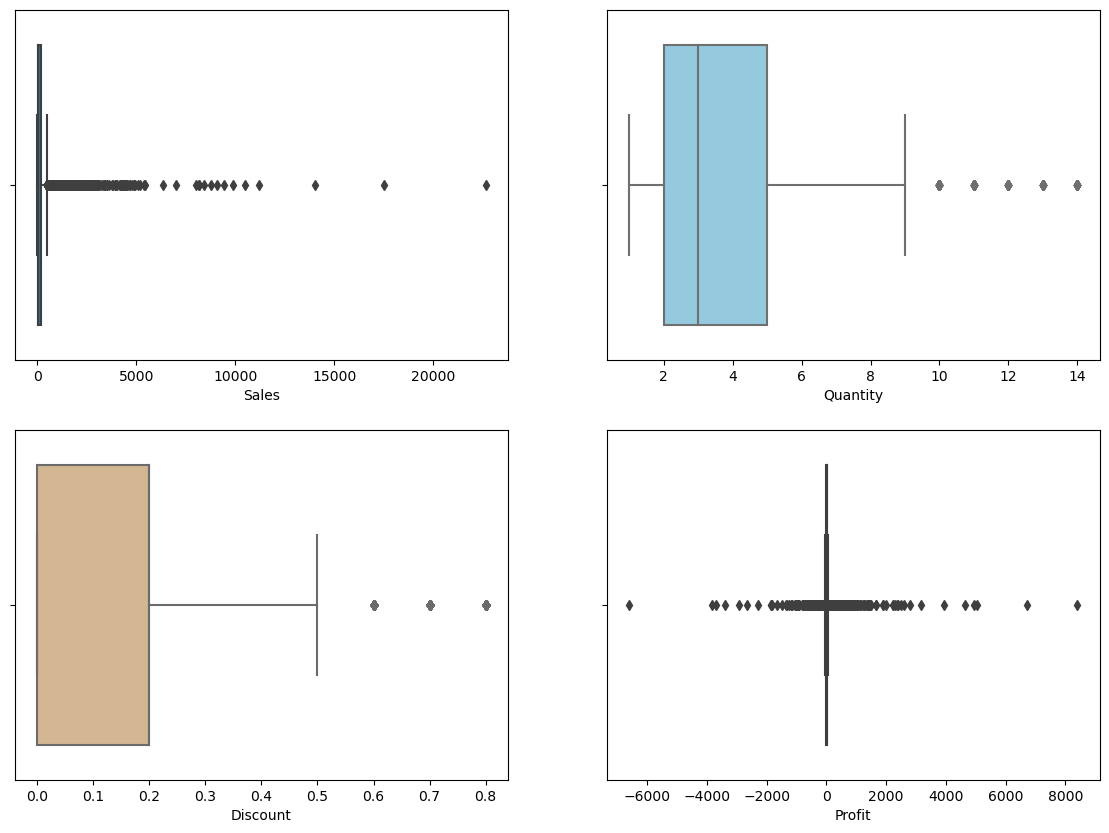

In [9]:
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x=data.Sales)

plt.subplot(2,2,2)
sns.boxplot(x=data.Quantity, color='skyblue')

plt.subplot(2,2,3)
sns.boxplot(x=data.Discount, color='burlywood')

plt.subplot(2,2,4)
sns.boxplot(x=data.Profit)

plt.show()

#### The distribution plots and box plots tells us
- the presence of great number of outliers in sales and profit, and majority of sales and profit is distributed towards zero
- Quantity and Discount columns are positively skewed

In [10]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

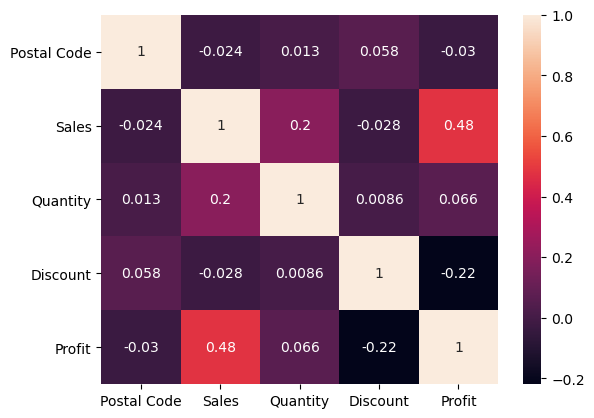

In [11]:
sns.heatmap(data.corr(),annot=True)

#### Here it can be seen, Sales and discount have the maximum correlation with the profits
- Sales being positively correlated, more the sales more the profit
- Discount being negatively correlated, more the discount less the profit

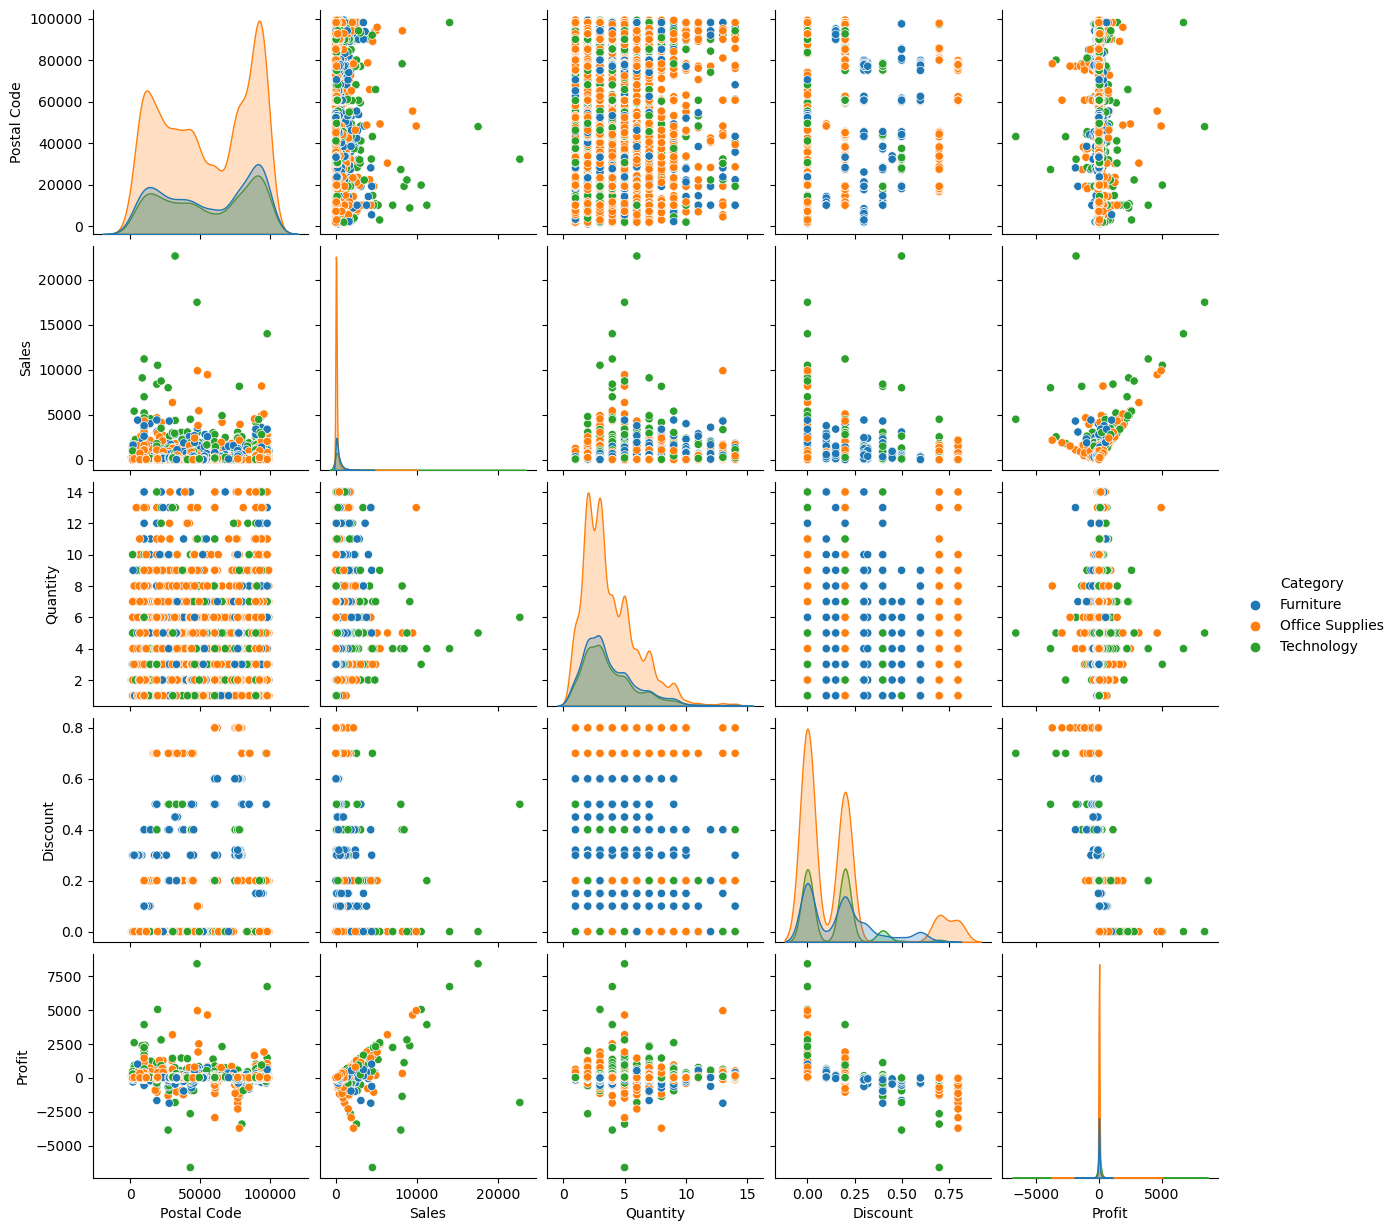

In [12]:
sns.pairplot(data, hue='Category')

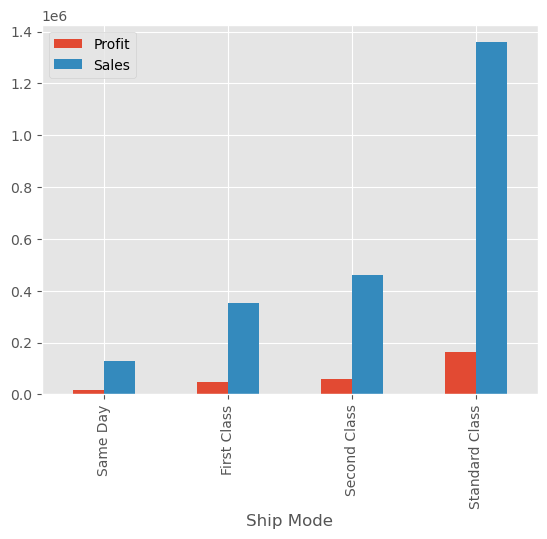

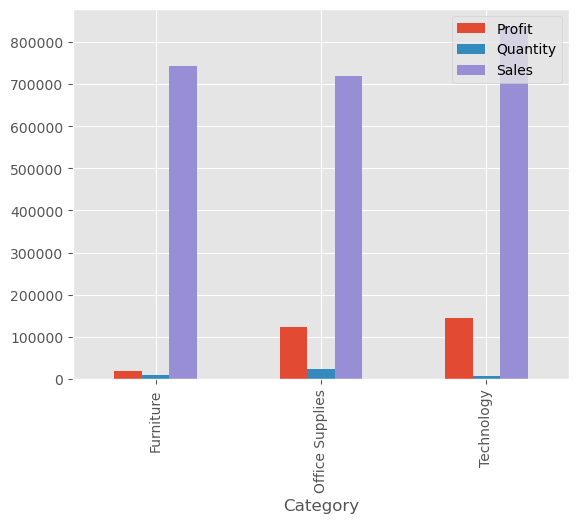

In [13]:
plt.style.use('ggplot')
ship_group=data.groupby('Ship Mode')['Profit','Sales'].agg(sum)
cat_group=data.groupby('Category')['Profit','Quantity','Sales'].agg(sum)
ship_group=ship_group.sort_values('Profit')
cat_group=cat_group.sort_values('Profit')
ship_group.plot.bar()
cat_group.plot.bar()
plt.show()

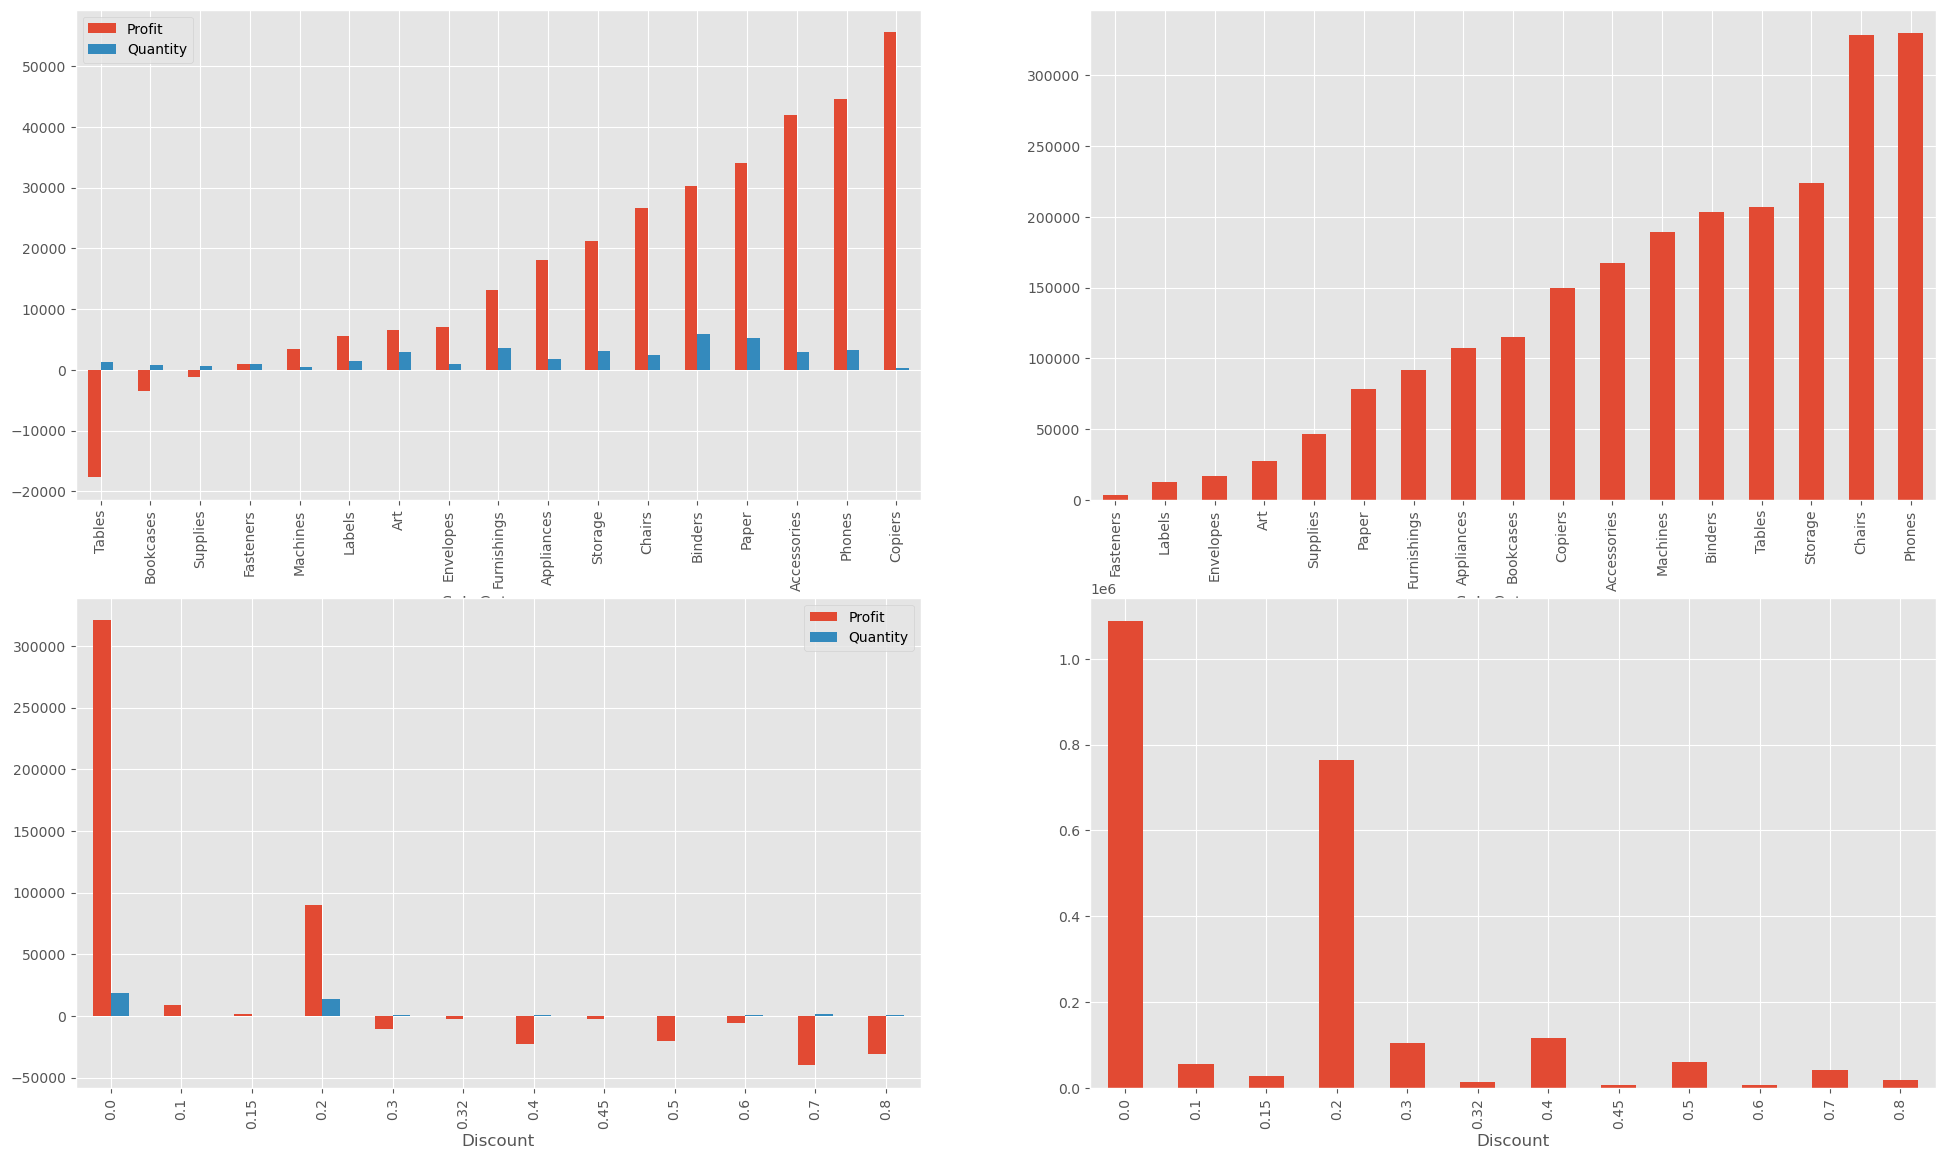

In [14]:
fig,axes=plt.subplots(2,2,figsize=(24,14))
subcat_group1=data.groupby('Sub-Category')['Profit','Quantity'].agg(sum).sort_values('Profit')
subcat_group2=data.groupby('Sub-Category')['Sales'].agg(sum).sort_values()
dis_group1=data.groupby('Discount')['Profit','Quantity'].agg(sum)
dis_group2=data.groupby('Discount')['Sales'].agg(sum)
axe=axes.ravel()
subcat_group1.plot.bar(ax=axe[0])
subcat_group2.plot.bar(ax=axe[1])
dis_group1.plot.bar(ax=axe[2])
dis_group2.plot.bar(ax=axe[3])
plt.show()

#### In terms of profit and sales,
- Standard class has most sales as compared to other shipment modes
- Products under the technology category has the highest sales and profit, whereas furniture products have high sales but the profit is quite less. 
- Also products like Phones, Accessories, Copiers have high profits and sales
- It can be seen that products like Tables, Machines have higher sales but their profit is negative.
- Also with the increase in discount, the profit as well as sales decrease.

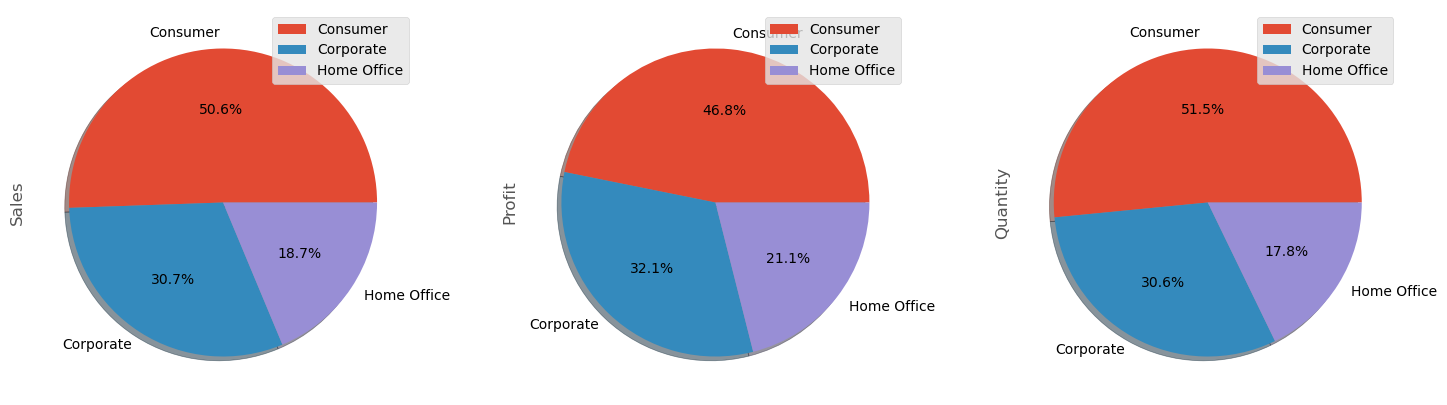

In [15]:
seg_group=data.groupby('Segment')['Sales','Profit','Quantity'].agg(sum)
seg_group.plot.pie(subplots=True, autopct='%1.1f%%', figsize=(18,5), shadow=True, labels=seg_group.index)
plt.show()

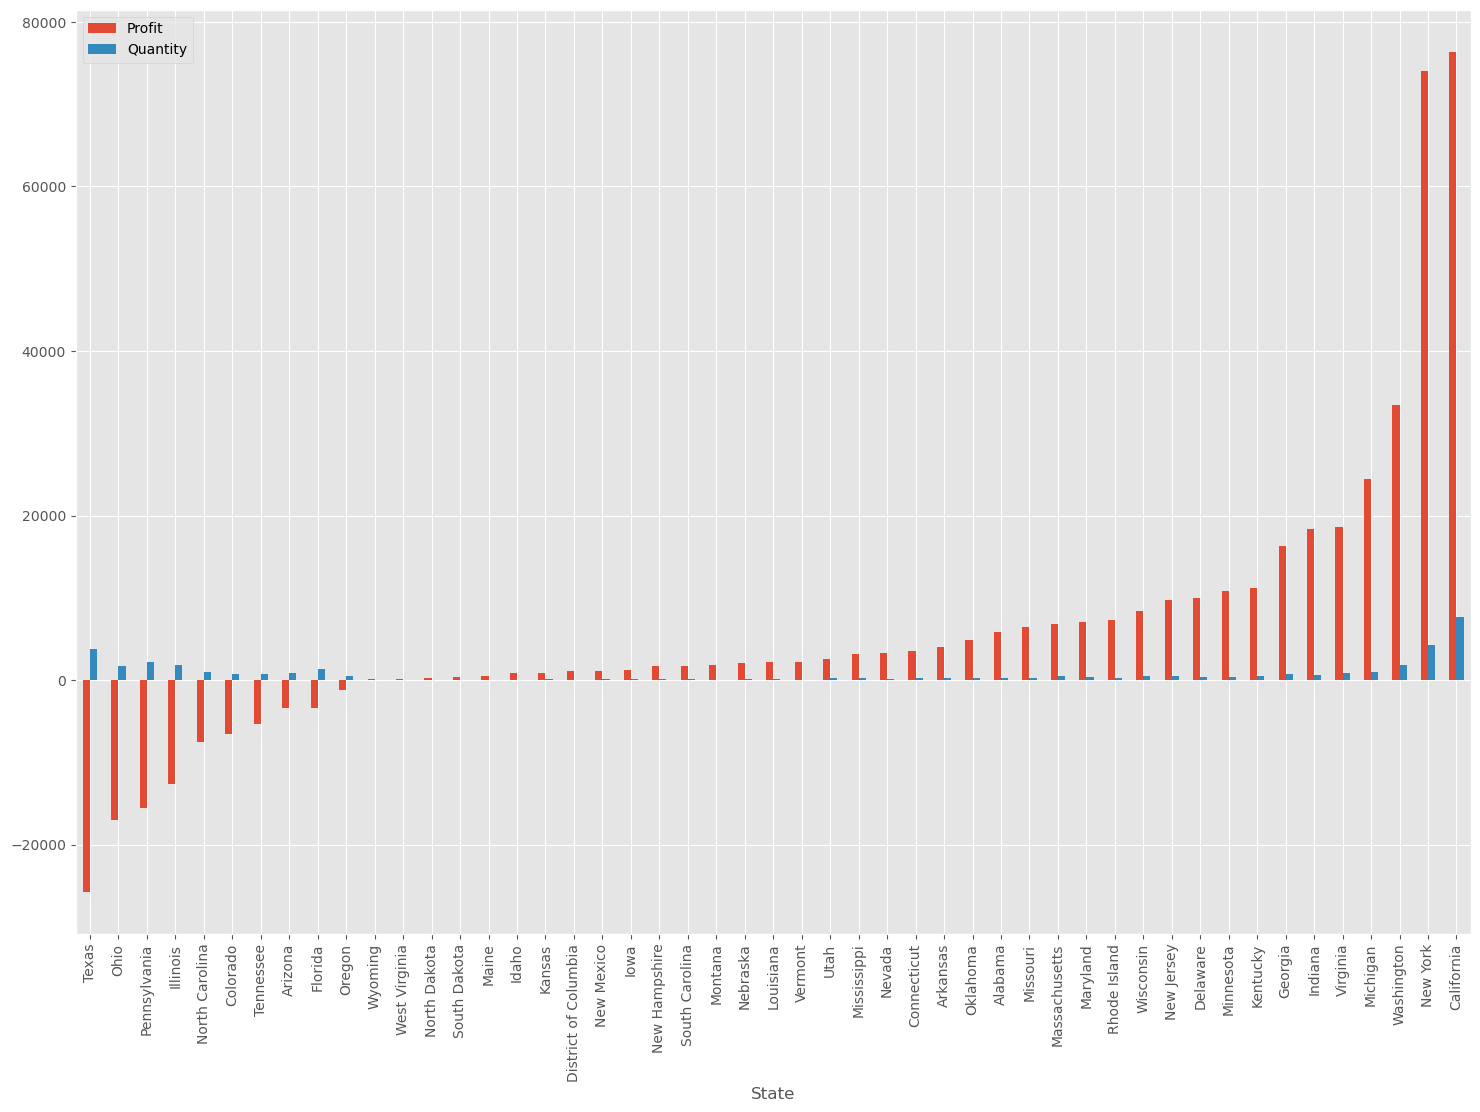

In [16]:
state_group=data.groupby('State')['Profit','Quantity'].agg(sum)
state_group=state_group.sort_values('Profit')
state_group.plot.bar(figsize=(18,12))
plt.show()

#### Statewise,
- maximum profits and quantity of orders come from California and New York

### Conclusions:

- Areas like California and New York give the maximum business, so those countries could be kept in focus for keeping their engagement intact or even try to further increase their engagements 
- Discounts should be decreased as they have a heavy negative impact on the profits.
- Also invest more on technology and decrease sales of furniture as furniture can cause losses or minimal profits whereas technolgy has a great scope in increasing profits 